## Método de Newton Raphson (NR):

---

Em análise numérica, o método de Newton, desenvolvido por Isaac Newton e Joseph Raphson, tem o objetivo de estimar as raízes de uma função.


### Método NR monovariável:

---

A dedução matemática do método de NR é simplesmente baseada na expanção do primeiro termo da  série de Taylor.

\begin{equation}
    f(x) = f(x^{(0)}) + [ x-x^{(0)} ] \cdot f'(x^{(0)})
\end{equation}

Com o interesse em determinar as raízes da função $f(x)$, isso é $f(x) = 0$. É possível manipular a expressão anterior e obter a seguinte.

\begin{equation}
    x = x^{(0)} -\frac{f(x^{(0)})}{f'(x^{(0)})} 
\end{equation}

Seja uma função contínua $f(x)$, deseja-se obter através de um chute inicial $f(x)=0$ para isso deve-se seguir o processo iterativo apresentado abaixo.

\begin{equation}
    x^{(h+1)} = x^{(h)} - \frac{f(x^{(h)})}{f^{'}(x^{(h)})}
\end{equation}

### Interpretação gráfica do processo iterativo.

---

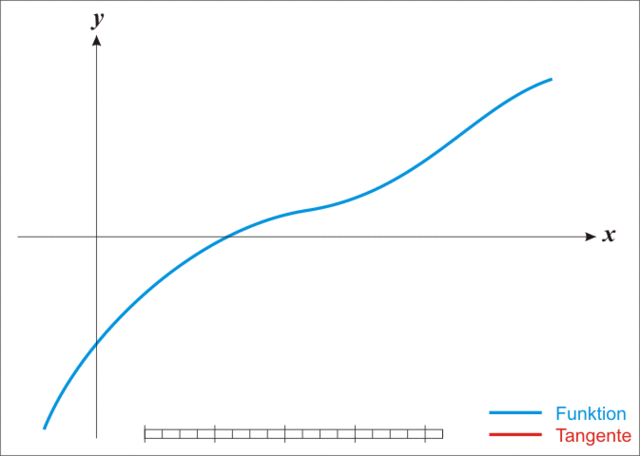

In [151]:
# Importando bibliotecas para a execução de um exemplo:
import numpy as np
import pandas as pd

# Parâmetros de entrada:
x0 = 3       # Chute inicial
tol = 1e-5   # Tolerância

# Função principal:
def f(x):
    return x**3 - 2*x - 5

# Derivada da função:
def dx(x):
    return 3*x**2 - 2
    
# Parâmetros da iteração zero:
u = [0]      
err = [abs(f(x0))]
x_ = [x0]

while(err[-1] > tol):
    u.append(u[-1] + 1)
    x_.append(x_[-1] - f(x_[-1])/dx(x_[-1]))
    err.append(abs(f(x_[-1])))
    
    # Armazenamento:
    dic = {'X': x_, 'Erro': err}
    df = pd.DataFrame(dic)
    
    # Tratamento de divergências:
    if u[-1]>100:
        print(f'Sistema não convergiu')
        break
    
display(df)
    

,X,Erro
0,3.000000,16.000000
1,2.360000,3.424256
2,2.127197,0.371100
3,2.095136,0.006527
4,2.094552,0.000002


### Método da secante monovariável:

---

Seja uma função contínua $f(x)$, deseja-se obter através de um chute inicial $f(x)=0$ sem a necessidade de calcular a derivada da função.

\begin{equation}
    x^{(h+1)} = 
    x^{(h)} - \frac{f(x^{(h)})}{\frac{\Delta f(x)}{\Delta(x)}} = 
    x^{(h)} - \frac{f(x^{(h)})}{\frac{f(x^{(h)}) - f(x^{(h-1)})}{x^{(h)} - x^{(h-1)}}}
\end{equation}

In [152]:
# Importando bibliotecas para a execução de um exemplo:
import numpy as np
import pandas as pd

# Parâmetros de entrada:
x0 = [3, 3+1e-8]    # Chute inicial
tol = 1e-5          # Tolerância

# Função principal:
def f(x):
    return x**3 - 2*x - 5

# Derivada numérica da função:
def dx(x1, x2):
    return (f(x1)-f(x2))/(x1-x2)

# Parâmetros da iteração zero:
u = [0]      
err = [abs(f(x0[-1])), abs(f(x0[-2]))]
x_ = x0

while(err[-1] > tol):
    u.append(u[-1] + 1)
    x_.append(x_[-1] - f(x_[-1])/dx(x_[-1], x_[-2]))
    err.append(abs(f(x_[-1])))
    
    # Acompanhamento:
    dic = {'X': x_, 'Erro': err}
    df1 = pd.DataFrame(dic)
    
    # Tratamento de divergências:
    if u[-1]>100:
        print(f'Sistema não convergiu')
        break
           
display(df1)
    

,X,Erro
0,3.000000,1.600000e+01
1,3.000000,1.600000e+01
2,2.360000,3.424256e+00
3,2.185734,1.070731e+00
4,2.106452,1.337206e-01
5,2.095138,6.547216e-03
6,2.094555,4.363079e-05
7,2.094551,1.440038e-08


### Método NR multivariável:

---

Seja um um conjunto de N equações não lineares e N incógnitas, deseja-se utilizar do método de NR para a solução do problema. Inicialmente, deve-se construir uma função igualada a zero, através das equações não lineares do problema em questão.

#### Exemplo:

---

Seja o sistema de equações não linear, abaixo.

\begin{align}
    x_1^2 + \sin{x_2} &= \pi\\
    x_1^3 &= x_2
\end{align}

Construindo uma função igualada a zero

\begin{align}
    x_1^2 + \sin{x_2} - \pi & = 0\\
    x_2^3 -x_2 &= 0
\end{align}

Tomando as expressões a esquerda da igualdade

\begin{align}
    f_1(x_1,x_2) &= x_1^2 + \sin{x_2} - \pi \\
    f_1(x_1,x_2) &= x_1^3 -x_2
\end{align}

---

De posse das funções que deseja-se calcular as raízes, deve-se realizar a linearização. A linearização de funções multivariáveis é feita como demonstrado a seguir

\begin{align}
    f_1(x_1,x_2) &= f_1(\bar{x}^{(0)}) +  \frac{\partial f_1(\bar{x}^{(0)})}{\partial x_1}[x_1 - x_1^{(0)}]  +  \frac{\partial f_1(\bar{x}^{(0)})}{\partial x_2} [x_2 - x_2^{(0)}]\\
    f_1(x_1,x_2) &= f_2(\bar{x}^{(0)}) +  \frac{\partial f_2(\bar{x}^{(0)})}{\partial x_1} [x_1 - x_1^{(0)}] +  \frac{\partial f_2(\bar{x}^{(0)})}{\partial x_2} [x_2 - x_2^{(0)}]
\end{align}

em que,

\begin{equation}
    \bar{x}^{(0)} = [x_1^{(0)}, x_2^{(0)}]
\end{equation}

---

Feita a linearização, pode-se equacionar o sistema na forma matricial.

\begin{align}
    \underbrace{\bar{f}(x_1,x_2)}_{\bar{0}} &= \bar{f}(x_1,x_2)^{(0)} +  \underbrace{\frac{\partial \bar{f}(\bar{x}^{(0)})}{\partial \bar{x}}}_{\text{Jacobiana}} [\bar{x} - \bar{x}^{(0)}]
\end{align}

Manipulando o sistema matricial, tem-se.

\begin{align}
    \bar{x} &= \bar{x}^{(0)} -  [\text{Jacobiana}(\bar{x}^{(h)})]^{-1} \bar{f}(\bar{x}^{(0)})
\end{align}

Para o método iterativo, tem-se finalmente:

\begin{align}
    \bar{x}^{(h+1)} &= \bar{x}^{(h)} -  [\text{Jacobiana}(\bar{x}^{(h)})]^{-1} \bar{f}(\bar{x}^{(h)})
\end{align}

In [179]:
# Função:
def f(x):
    x1 = x[0]
    x2 = x[1]
    F =  [x1+2*x2-2, x1**2+4*x2**2 - 4]
    return F

# Jacobiana simbólica:
def jac(x):
    x1 = x[0]
    x2 = x[1]
    J = [[1,2],
         [2*x1,8*x2]]
    return J

# Parâmetros de entrada:
x0 = [[0, 0], 
      [0.5, 1.5+1e-5]]    # Chute inicial

tol = 1e-5                # Tolerância
    
# Parâmetros da iteração zero:
u = 0   
x_ = x0
err = [f(x0[0]), f(x0[1])]

while(abs(err[-1][0]) > tol or abs(err[-1][1]) > tol):
    u+=1
    xat = x_[-1] - np.transpose(np.matmul(np.linalg.inv(jac(x_[-1])),np.transpose(f(x_[-1]))))
    x_.append(list(xat))
    
    err_at = f(x_[-1])
    err.append(err_at)

    # Tratamento de divergências:
    if u>100:
        print(f'Sistema não convergiu')
        break
        
# Apresentação:       
dic = {'X': x_, 'Erro': err}
df = pd.DataFrame(dic)
df

,X,Erro
0,"[0, 0]","[-2, -4]"
1,"[0.5, 1.50001]","[1.5000200000000001, 5.250120000400001]"
2,"[-0.2500060000319997, 1.1250030000159998]","[0.0, 1.125030000232]"
3,"[-0.025001080014975863, 1.012500540007488]","[0.0, 0.10125442806373464]"
4,"[-0.00030490406990875407, 1.0001524520349545]","[4.440892098500626e-16, 0.0012198022126206354]"
5,"[-4.6469077275576934e-08, 1.0000000232345385]","[-2.220446049250313e-16, 1.8587631167577e-07]"


### Método da secante multivariável:

---

Nesse método, pode-se aproximar a matriz Jacobiana como demonstrado abaixo:

\begin{equation}
\begin{bmatrix}
\frac{\partial F_1(x_1,x_2)}{\partial x_1} & \frac{\partial F_1(x_1,x_2)}{\partial x_2}\\ 
\frac{\partial F_2(x_1,x_2)}{\partial x_1} & \frac{\partial F_2(x_1,x_2)}{\partial x_2}
\end{bmatrix} = 
\begin{bmatrix}
\frac{ F_1(x_1^{(n)},0) - F_1(x_1^{(n-1)},0)}{ x_1^{(n)}- x_1^{(n-1)}} & 
\frac{ F_1(0,x_2^{(n)}) - F_1(0,x_2^{(n-1)})}{ x_2^{(n)}- x_2^{(n-1)}}\\ 
\frac{ F_2(x_1^{(n)},0) - F_2(x_1^{(n-1)},0)}{ x_1^{(n)}- x_1^{(n-1)}} & 
\frac{ F_2(0,x_2^{(n)}) - F_2(0,x_2^{(n-1)})}{ x_2^{(n)}- x_2^{(n-1)}}
\end{bmatrix}
\end{equation}


In [178]:
# Função:
def f(x):
    x1 = x[0]
    x2 = x[1]
    F =  [x1+2*x2-2, x1**2+4*x2**2 - 4]
    return F

# Jacobiana simbólica:
def jac(xa,xb):    
    e11 = (f([xa[0],0])[0]-f([xb[0],0])[0])/(xa[0]-xb[0])
    e12 = (f([0,xa[1]])[0]-f([0,xb[1]])[0])/(xa[1]-xb[1])
    
    e21 = (f([xa[0],0])[1]-f([xb[0],0])[1])/(xa[0]-xb[0])
    e22 = (f([0,xa[1]])[1]-f([0,xb[1]])[1])/(xa[1]-xb[1])
    
    J = [[e11,e12],
         [e21,e22]]
    return J

# Parâmetros de entrada:
x0 = [[0.5, 1.5], 
      [0.6, 1.6]]    # Chute inicial

tol = 1e-5                # Tolerância
    
# Parâmetros da iteração zero:
u = 0   
x_ = x0
err = [f(x0[0]), f(x0[1])]

while(abs(err[-1][0]) > tol or abs(err[-1][1]) > tol):
    u+=1
    xat = x_[-1] - np.transpose(np.matmul(np.linalg.inv(jac(x_[-1],x_[-2])),np.transpose(f(x_[-1]))))
    x_.append(list(xat))
    
    err_at = f(x_[-1])
    err.append(err_at)

    # Tratamento de divergências:
    if u>100:
        print(f'Sistema não convergiu')
        break
        
# Apresentação:       
dic = {'X': x_, 'Erro': err}
df = pd.DataFrame(dic)
df

,X,Erro
0,"[0.5, 1.5]","[1.5, 5.25]"
1,"[0.6, 1.6]","[1.8000000000000003, 6.600000000000001]"
2,"[-0.2941176470588237, 1.1470588235294121]","[4.440892098500626e-16, 1.3494809688581348]"
3,"[-0.03401360544217702, 1.0170068027210886]","[0.0, 0.13836827247906136]"
4,"[-0.004297009281539831, 1.0021485046407699]","[0.0, 0.01722496570369003]"
5,"[-7.170486049980739e-05, 1.00003585243025]","[0.0, 0.0002868297251730212]"
6,"[-1.5372244090730526e-07, 1.0000000768612205]","[0.0, 6.148898119562318e-07]"
